# State tomography

It is not possible to learn (or estimate) a quantum state in a single experiment due to the [no cloning theorem](https://en.wikipedia.org/wiki/No-cloning_theorem). In general one needs to re-prepare the state and measure it many times in [different bases](https://quantumcomputing.stackexchange.com/questions/1870/what-does-measurement-in-a-certain-basis-mean).

## Background 

### Classical "state" tomography 
The simplest classical analogy to estimating a quantum state using tomography is estimating the bias of a coin. The bias, denoted by $p$, is analogous to the quantum state in a way that will be explained shortly.

The coin toss is a random variable $R$ with outcome Heads (denoted by $1$) and tails (denoted by $0$). Given the bias $p$, the probability distribution for the random variable $R$ is

$$\Pr(R|p) = p^R(1-p)^{1-R}$$

If we have access to $n_{\rm Tot}$ independent experiments (or measurements) and observe $n_{\rm H}$ heads then the [maximum likelihood estimate](http://mathworld.wolfram.com/MaximumLikelihood.html) for the bias of the coin is

$$p_{\rm Max-Like} = \frac{n_H}{n_{\rm Tot}}$$

and the variance of this estimator is ${\rm Var}[p_{\rm Max-Like}] = p(1-p)/n_{\rm Tot}$.

The things to learn from this example are:

* it takes many measurements to estimate $p$, it can't be done in a single shot because of the [classical no-cloning theorem](https://doi.org/10.1103/PhysRevLett.88.210601)

* $p_{\rm Max-Like}$ is an estimator, there are other choices of estimators see e.g. [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution#Bayesian_inference) and [Bayes estimator](https://en.wikipedia.org/wiki/Bayes_estimator)


Let's take the analogy a little further by defining a "quantum" state 

$$\begin{align}
\rho 
&= \begin{pmatrix} p & 0\\ 0 & 1-p\end{pmatrix} \\
&= \frac{1}{2} (I +z Z)\\
&=\frac{1}{2} \begin{pmatrix} 1+z & 0\\ 0 & 1-z\end{pmatrix},
\end{align}$$

where $I$ and $Z$ are the identity and the Pauli-z matrix. This parameterizes the states along the z-axis of the Bloch sphere, see Figure 1.

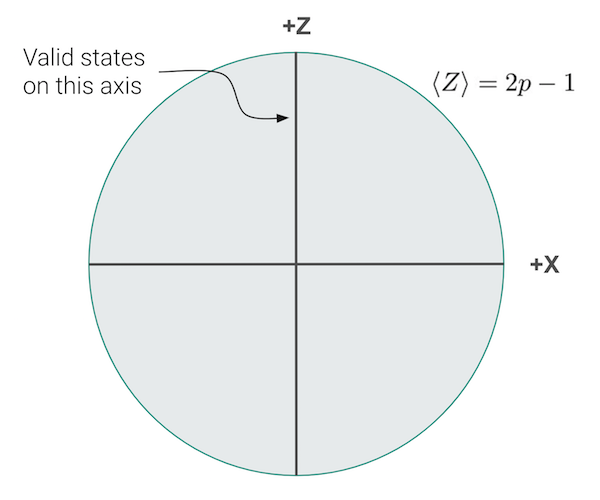
Figure 1. A cross section through the [Bloch sphere](https://en.wikipedia.org/wiki/Bloch_sphere). The states along the z-axis are equivalent to the allowed states (biases) of a coin.

Given the state $\rho$ the probability of measuring zero and one are

$$\begin{align}
\Pr(0|\rho) &= {\rm Tr}[\rho \Pi_0]\\
\Pr(1|\rho) &= {\rm Tr}[\rho \Pi_1]
\end{align}$$

where the measurement operators $\Pi_i$ are defined by $\Pi_i = |i\rangle \langle i|$ for $i \in \{0, 1 \}$.

The relationship between the $Z$ expectation value and the coin bias is

$$z:= \langle Z \rangle = {\rm Tr}[Z \rho] = 2 p -1$$

In this analogy the pure states $|0\rangle$ and $|1\rangle$ correspond to the coin biases $p=1$, $p=0$ and z expectation values $z=+1$, $z=-1$ respectively. All other (mixed) states are convex mixtures of these extremal points e.g. the fair coin, i.e. $p=1/2$, corresponds to $z = 0$ and the state  

$$\rho 
= \begin{pmatrix} 0.5 & 0\\ 0 & 0.5\end{pmatrix}$$

### Quantum state tomography of a single qubit

The simplest quantum system to tomograph is a single qubit. Like before we parameterize the state with respect to a set of operators 

$$\begin{align}
\rho 
&= \frac{1}{2} (I+x X+ y Y +z Z)\\
&=\frac{1}{2} \begin{pmatrix} 1+z & x+iy\\ x-iy & 1-z\end{pmatrix},
\end{align}$$ 

where $x = \langle X \rangle$, $y = \langle Y \rangle$, and $z = \langle Z \rangle$. In the language of our classical coin we have three parameters we need to estimate that are constrained in the following way

$$0\le x \le 1,\\
0\le y \le 1,\\ 
0\le z \le 1,\\
x^2 + y^2 +z^2 \le 1$$

The physics of our system means that our default measurement gives us the Z basis statistics. We already constructed an estimator to go from the coin flip statistics to the Z expectation: $2p -1$. 


Now we need to measure the statistics of the operators X and Y. Essentially this means we must rotate our state after we prepare it but before it is measured (or equivalently rotate our measurement basis). If we rotate the state as $\rho\mapsto U\rho U^\dagger$ and then do our usual Z-basis measurement, this is equivalent to rotating the measured observable as $Z \mapsto U^\dagger Z U$ and keeping our state $\rho$ unchanged. This is the distinction between the [Heisenberg and Schrödinger pictures](https://en.wikipedia.org/wiki/Heisenberg_picture#Summary_comparison_of_evolution_in_all_pictures). The Heisenberg picture point of view then allows us to see that if we apply a rotation such as $R_y(\alpha) = \exp(-i \alpha Y /2)$ for $\alpha = -\pi/2$ then this rotates the observable as $R_y(\pi/2)ZR_y(-\pi/2)=\cos(\pi/2) Z + \sin(\pi/2) X = X$. Similarly, we could rotate by $U=R_x(\pi/2)$ to measure the Y observable.  


### Quantum state tomography in general   

In this section we closely follow the reference [PBT]. 

When thinking about tomography it is useful to introduce the notation of "super kets" $|O\rangle \rangle = {\rm vec}(O)$  for an operator $O$.
The dual vector is the corresponding "super bra" $\langle\langle O|$ and represents $O^\dagger$. This vector space is equipped with the Hilbert-Schmidt inner product  $\langle\langle A | B \rangle\rangle = {\rm Tr}[A^\dagger B]$. For more information see [vec and unvec in superoperator_representations.md](../superoperator_representations.rst) and the [superoperator_tools ipython notebook](superoperator_tools.ipynb).

A quantum state matrix on $n$ qubits, a  $D =2^n$ dimensional Hilbert
space, can be represented by 

$$\rho =  \frac{1}{D} I + \sum_{\alpha=1}^{D^2-1}x_\alpha B_\alpha$$

where the coefficients $x_\alpha$ are defined by $x_\alpha = \langle\langle B_\alpha | \rho \rangle\rangle$ for a basis of Hermitian operators
$\{ B_\alpha \}$ that is orthonormal under the Hilbert-Schmidt inner product
$\langle\langle B_\alpha | B_\beta\rangle\rangle =\delta_{\alpha,\beta}$.

For many qubits, tensor products of Pauli matrices are the natural Hermitian basis. For two qubits define $B_5 = X \otimes X$ and $B_6 = X \otimes Y$ then $\langle\langle B_5 | B_6\rangle\rangle =0$. It is typical to choose $B_0 = I / \sqrt {D}$ to be the only traceful element, where $I$ is the identity on $n$ qubits.

State tomography involves estimating or measuring the expectation values of all the operators $\{ B_\alpha \}$. If you can reconstruct all the operators $\{ B_\alpha \}$ then your measurement is said to be **tomographically complete**. To measure these operators we need to do rotations, like in the single qubit case, on many qubits. This is depicted in Figure 2.

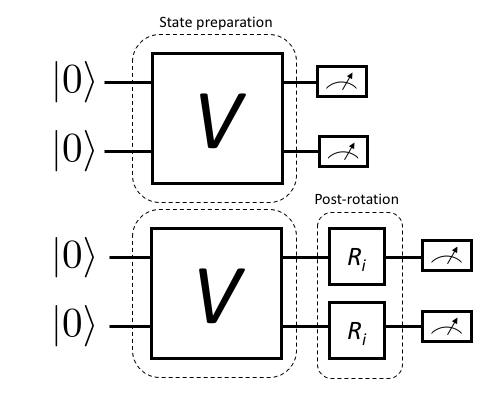
Figure 2. This upper half of this diagram shows a simple 2-qubit quantum program consisting of both qubits initialized in the ∣0⟩ state, then transformed to some other state via a process V and finally measured in the natural qubit basis.

The operators that need to be estimated are programmatically given by `itertools.product(['I', 'X', 'Y', 'Z'], repeat=n_qubits)`. From these measurements, we can reconstruct a density matrix $\rho$ on `n_qubits`.


Most research in quantum state tomography is to do with finding estimators with desirable properties, e.g. [Minimax tomography](https://arxiv.org/abs/1503.03100), although experiment design is also considered e.g. [adaptive quantum state tomography](https://arxiv.org/abs/1303.0436).  


**More information**  

See the following references:  

| [QTW] [Quantum tomography Wikipedia page](https://en.wikipedia.org/wiki/Quantum_tomography)  

| [CWPHD] *Initialization and characterization of open quantum systems*.  
|     Christopher Wood.  
|     Chapter 3, PhD Thesis, University of Waterloo (2015).  
|     http://hdl.handle.net/10012/9557  


| [IGST] *Introduction to Quantum Gate Set Tomography*.  
|     Daniel Greenbaum.  
|     arXiv:1509.02921 (2015).    
|     https://arxiv.org/abs/1509.02921  


| [PBT] *Practical Bayesian Tomography*.  
|     Christopher Granade et al.  
|     New J. Phys. 18, 033024 (2016).  
|     https://dx.doi.org/10.1088/1367-2630/18/3/033024  
|     https://arxiv.org/abs/1509.03770

## Quantum state tomography in `forest.benchmarking`

The basic workflow is:

1. Prepare a state by specifying a pyQuil program.
2. Construct a list of observables that are needed to estimate the state; we collect this into an object called an `ObservablesExperiment`.
3. Acquire the data by running the program on a QVM or QPU.
4. Apply an estimator to the data to obtain an estimate of the state.
5. Compare the estimated state to the true state by a distance measure or visualization.


Below we break these steps down into all their ghastly glory. 

## Step 1. Prepare a state with a `Program`
We'll construct a two-qubit graph state by Hadamarding all qubits and then applying a controlled-Z operation across the edges of our graph. In the two-qubit case, there's only one edge. The vector we end up preparing is

$$|\Psi\rangle = \frac{1}{2}\begin{pmatrix} 1\\ 1 \\ 1\\ -1\end{pmatrix}= {\rm CZ}(0,1){\rm H}(1){\rm H}(0)|0,0\rangle$$

which corresponds to the state matrix

$$\rho_{\rm true} = |\Psi\rangle\langle \Psi| = \frac{1}{4}\begin{pmatrix} 1 & 1 & 1 &-1\\ 1 & 1 & 1 &-1 \\ 1 & 1 & 1 &-1\\ -1 & -1 & -1 & 1\end{pmatrix}$$


In [1]:
import numpy as np
from pyquil import Program
from pyquil.gates import *

In [2]:
# numerical representation of the true state
Psi = (1/2) * np.array([1, 1, 1, -1])
rho_true = np.outer(Psi, Psi.T.conj())

rho_true

array([[ 0.25,  0.25,  0.25, -0.25],
       [ 0.25,  0.25,  0.25, -0.25],
       [ 0.25,  0.25,  0.25, -0.25],
       [-0.25, -0.25, -0.25,  0.25]])

In [3]:
# construct the state preparation program

qubits = [0, 1]
state_prep_prog = Program()

for qubit in qubits:
    state_prep_prog += H(qubit)
    
state_prep_prog += CZ(qubits[0], qubits[1])

print(state_prep_prog)

H 0
H 1
CZ 0 1



## Step 2. Construct a `ObservablesExperiment` for state tomography

We use the helper function `generate_state_tomography_experiment` to construct a tomographically complete set of measurements.

We can print this out to see the 15 observables or operator measurements we will perform. Note that we could have included an additional observable `I0I1`, but since this trivially gives an expectation of 1 we instead omit this observable in experiment generation and include its contribution by hand in the estimation methods. Be mindful of this if generating your own settings.

In [4]:
# import the generate_state_tomography_experiment function 
from forest.benchmarking.tomography import generate_state_tomography_experiment

experiment = generate_state_tomography_experiment(program=state_prep_prog, qubits=qubits)

print(experiment)

H 0; H 1; CZ 0 1
0: Z+_0 * Z+_1→(1+0j)*X1
1: Z+_0 * Z+_1→(1+0j)*Y1
2: Z+_0 * Z+_1→(1+0j)*Z1
3: Z+_0 * Z+_1→(1+0j)*X0
4: Z+_0 * Z+_1→(1+0j)*X0X1
5: Z+_0 * Z+_1→(1+0j)*X0Y1
6: Z+_0 * Z+_1→(1+0j)*X0Z1
7: Z+_0 * Z+_1→(1+0j)*Y0
8: Z+_0 * Z+_1→(1+0j)*Y0X1
9: Z+_0 * Z+_1→(1+0j)*Y0Y1
10: Z+_0 * Z+_1→(1+0j)*Y0Z1
11: Z+_0 * Z+_1→(1+0j)*Z0
12: Z+_0 * Z+_1→(1+0j)*Z0X1
13: Z+_0 * Z+_1→(1+0j)*Z0Y1
14: Z+_0 * Z+_1→(1+0j)*Z0Z1


In [5]:
# lets peek into the object
print('The object "experiment" is a:')
print(type(experiment),'\n')
print('It has a program attribute:')
print(experiment.program)
print('It also has a list of observables that need to be estimated:')
print(experiment.settings_string())

The object "experiment" is a:
<class 'forest.benchmarking.observable_estimation.ObservablesExperiment'> 

It has a program attribute:
H 0
H 1
CZ 0 1

It also has a list of observables that need to be estimated:
0: Z+_0 * Z+_1→(1+0j)*X1
1: Z+_0 * Z+_1→(1+0j)*Y1
2: Z+_0 * Z+_1→(1+0j)*Z1
3: Z+_0 * Z+_1→(1+0j)*X0
4: Z+_0 * Z+_1→(1+0j)*X0X1
5: Z+_0 * Z+_1→(1+0j)*X0Y1
6: Z+_0 * Z+_1→(1+0j)*X0Z1
7: Z+_0 * Z+_1→(1+0j)*Y0
8: Z+_0 * Z+_1→(1+0j)*Y0X1
9: Z+_0 * Z+_1→(1+0j)*Y0Y1
10: Z+_0 * Z+_1→(1+0j)*Y0Z1
11: Z+_0 * Z+_1→(1+0j)*Z0
12: Z+_0 * Z+_1→(1+0j)*Z0X1
13: Z+_0 * Z+_1→(1+0j)*Z0Y1
14: Z+_0 * Z+_1→(1+0j)*Z0Z1


### Optional grouping
We can simultaneously estimate some of these observables, this saves on run time.

In [6]:
from forest.benchmarking.observable_estimation import group_settings
print(group_settings(experiment))

H 0; H 1; CZ 0 1
0: Z+_0 * Z+_1→(1+0j)*X1, Z+_0 * Z+_1→(1+0j)*X0, Z+_0 * Z+_1→(1+0j)*X0X1
1: Z+_0 * Z+_1→(1+0j)*Y1, Z+_0 * Z+_1→(1+0j)*X0Y1
2: Z+_0 * Z+_1→(1+0j)*Z1, Z+_0 * Z+_1→(1+0j)*X0Z1
3: Z+_0 * Z+_1→(1+0j)*Y0, Z+_0 * Z+_1→(1+0j)*Y0X1
4: Z+_0 * Z+_1→(1+0j)*Y0Y1
5: Z+_0 * Z+_1→(1+0j)*Y0Z1
6: Z+_0 * Z+_1→(1+0j)*Z0, Z+_0 * Z+_1→(1+0j)*Z0X1
7: Z+_0 * Z+_1→(1+0j)*Z0Y1
8: Z+_0 * Z+_1→(1+0j)*Z0Z1


## Step 3. Acquire the data

PyQuil will run the tomography programs.

We will use the QVM but at this point you can use a QPU.

In [7]:
from pyquil import get_qc
qc = get_qc('2q-qvm')

The next step is to over-write full `quilc` compilation with a much more simple version that *only* substitutes gates to Rigetti-native gates.

We do this because we don't want to accidentally compile away our tomography circuit or map to different qubits.

In [8]:
from forest.benchmarking.compilation import basic_compile
qc.compiler.quil_to_native_quil = basic_compile

Now get the data!

In [9]:
from forest.benchmarking.observable_estimation import estimate_observables

results = list(estimate_observables(qc, experiment))

print('ExperimentResult[(input operators)→(output operator): "mean" +- "standard error"]')
results

ExperimentResult[(input operators)→(output operator): "mean" +- "standard error"]


[ExperimentResult[Z+_0 * Z+_1→(1+0j)*X1: -0.02 +- 0.04471241438347967],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*Y1: 0.032 +- 0.04469845634918503],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*Z1: 0.068 +- 0.04461784396404649],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*X0: 0.012 +- 0.04471813949618208],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*X0X1: -0.012 +- 0.04471813949618208],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*X0Y1: -0.064 +- 0.044629676225578875],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*X0Z1: 1.0 +- 0.0],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*Y0: 0.088 +- 0.04454786190155483],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*Y0X1: -0.028 +- 0.04470382533967311],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*Y0Y1: 1.0 +- 0.0],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*Y0Z1: 0.012 +- 0.04471813949618208],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*Z0: 0.0 +- 0.044721359549995794],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*Z0X1: 1.0 +- 0.0],
 ExperimentResult[Z+_0 * Z+_1→(1+0j)*Z0Y1: -0.108 +- 0.044459779576601605],
 ExperimentResult[Z+_0 * 

## Step 4. Apply some estimators to the data "do tomography"

### Linear inversion estimator

In [10]:
from forest.benchmarking.tomography import linear_inv_state_estimate

rho_est_linv = linear_inv_state_estimate(results, qubits=qubits)

print(np.round(rho_est_linv, 3))

[[ 0.291-0.j     0.245+0.019j  0.253-0.025j -0.253+0.023j]
 [ 0.245-0.019j  0.209-0.j     0.247-0.009j -0.247-0.019j]
 [ 0.253+0.025j  0.247+0.009j  0.243+0.j    -0.255-0.035j]
 [-0.253-0.023j -0.247+0.019j -0.255+0.035j  0.257+0.j   ]]


### Linear inversion projected to closest physical state

In [11]:
from forest.benchmarking.operator_tools.project_state_matrix import project_state_matrix_to_physical

rho_phys = project_state_matrix_to_physical(rho_est_linv)

print(np.round(rho_phys, 3))

[[ 0.277+0.j     0.238+0.001j  0.248-0.024j -0.252+0.007j]
 [ 0.238-0.001j  0.222+0.j     0.232-0.016j -0.232-0.009j]
 [ 0.248+0.024j  0.232+0.016j  0.245+0.j    -0.247-0.027j]
 [-0.252-0.007j -0.232+0.009j -0.247+0.027j  0.256+0.j   ]]


### Maximum Likelihood Estimate (MLE) via diluted iterative method

In [12]:
from forest.benchmarking.tomography import iterative_mle_state_estimate

rho_mle = iterative_mle_state_estimate(results=results, qubits=qubits)

print(np.around(rho_mle, 3))

[[ 0.264+0.j     0.248-0.003j  0.256-0.017j -0.259+0.j   ]
 [ 0.248+0.003j  0.233-0.j     0.241-0.013j -0.243-0.003j]
 [ 0.256+0.017j  0.241+0.013j  0.249+0.j    -0.251-0.017j]
 [-0.259-0.j    -0.243+0.003j -0.251+0.017j  0.254-0.j   ]]


### MLE with Max Entropy constraint

In [13]:
rho_mle_maxent = iterative_mle_state_estimate(results=results, qubits=qubits, epsilon=0.1, entropy_penalty=0.05)

print(np.around(rho_mle_maxent, 3))

[[ 0.267+0.j     0.202+0.002j  0.208-0.015j -0.21 +0.005j]
 [ 0.202-0.002j  0.232+0.j     0.198-0.009j -0.199-0.006j]
 [ 0.208+0.015j  0.198+0.009j  0.248-0.j    -0.206-0.017j]
 [-0.21 -0.005j -0.199+0.006j -0.206+0.017j  0.254-0.j   ]]


### MLE with Hedging parameter

In [14]:
rho_mle_hedge = iterative_mle_state_estimate(results=results, qubits=qubits, epsilon=.001, beta=.61)

print(np.around(rho_mle_hedge, 3))

[[ 0.264+0.j     0.247-0.003j  0.255-0.017j -0.258+0.j   ]
 [ 0.247+0.003j  0.233-0.j     0.24 -0.013j -0.242-0.003j]
 [ 0.255+0.017j  0.24 +0.013j  0.249-0.j    -0.25 -0.017j]
 [-0.258-0.j    -0.242+0.003j -0.25 +0.017j  0.254+0.j   ]]


## Step 5. Compare estimated state to the true state

In [15]:
estimates = {
    'True State': rho_true,
    'Linear Inv': rho_est_linv,
    'ProjLinInv': rho_phys,
    'plain MLE': rho_mle,
    'MLE MaxEnt': rho_mle_maxent,
    'MLE Hedge': rho_mle_hedge}

### Compare fidelity and Trace distance to the true state

In [16]:
from forest.benchmarking.distance_measures import fidelity, trace_distance

for key, rho_e in estimates.items():
    fid = np.round(fidelity(rho_true, rho_e), 3)
    print(f"Fidelity(True State, {key}) = {fid}")

Fidelity(True State, True State) = 1.0
Fidelity(True State, Linear Inv) = 1.0
Fidelity(True State, ProjLinInv) = 0.974
Fidelity(True State, plain MLE) = 0.999
Fidelity(True State, MLE MaxEnt) = 0.861
Fidelity(True State, MLE Hedge) = 0.997


In [17]:
for key, rho_e in estimates.items():
    fid = np.round(trace_distance(rho_true, rho_e), 3)
    print(f"Tr_dist(True State, {key}) = {fid}")

Tr_dist(True State, True State) = 0.0
Tr_dist(True State, Linear Inv) = 0.055
Tr_dist(True State, ProjLinInv) = 0.042
Tr_dist(True State, plain MLE) = 0.025
Tr_dist(True State, MLE MaxEnt) = 0.086
Tr_dist(True State, MLE Hedge) = 0.025


### Compare purities of estimates

Notice how the Maximum entropy has a lower purity.

In [18]:
from forest.benchmarking.distance_measures import purity

In [19]:
for key, rho_e in estimates.items():
    p = np.round(purity(rho_e),3)
    print(f"{key} estimates a purity of {p}")

True State estimates a purity of 1.0
Linear Inv estimates a purity of 1.01
ProjLinInv estimates a purity of 0.954
plain MLE estimates a purity of 1.0
MLE MaxEnt estimates a purity of 0.75
MLE Hedge estimates a purity of 0.996


### Plot

There are many different ways to visualize states and processes in forest.benchmarking, see [state_and_process_plots.ipynb](state_and_process_plots.ipynb) for more options.

In [20]:
import matplotlib.pyplot as plt
from forest.benchmarking.plotting.hinton import hinton

fig, (ax1, ax2) = plt.subplots(1, 2)
hinton(rho_true, ax=ax1)
hinton(rho_mle_maxent, ax=ax2)
ax1.set_title('True')
ax2.set_title('Estimated via MLE MaxEnt')
fig.tight_layout()

Above we can't really see any difference. 

So lets try a more informative plot

Now we see a clear difference:


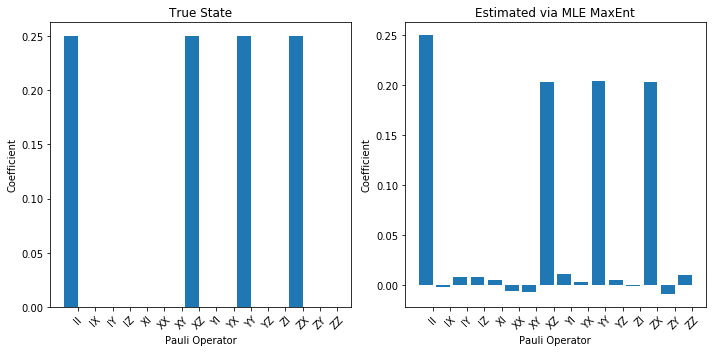

In [21]:
from forest.benchmarking.utils import n_qubit_pauli_basis
from forest.benchmarking.operator_tools.superoperator_transformations import vec, computational2pauli_basis_matrix
from forest.benchmarking.plotting.state_process import plot_pauli_rep_of_state, plot_pauli_bar_rep_of_state

# convert to pauli representation
n_qubits = 2
pl_basis = n_qubit_pauli_basis(n_qubits)
c2p = computational2pauli_basis_matrix(2*n_qubits)


rho_true_pauli = np.real(c2p @ vec(rho_true))

rho_mle_maxent_pauli = np.real(c2p @ vec(rho_mle_maxent)) 

fig1, (ax3, ax4) = plt.subplots(1, 2, figsize=(10,5))
plot_pauli_bar_rep_of_state(rho_true_pauli.flatten(), ax=ax3, labels=pl_basis.labels, title='True State')
plot_pauli_bar_rep_of_state(rho_mle_maxent_pauli.flatten(), ax=ax4, labels=pl_basis.labels, title='Estimated via MLE MaxEnt')
fig1.tight_layout()
print('Now we see a clear difference:')

## Advanced topics

### Parallel state tomography

The `ObservablesExperiment` [framework](observable_estimation.ipynb) allows for easy parallelization of experiments that operate on disjoint sets of qubits. Below we will demonstrate the simple example of tomographing two separate states, respectively prepared by `Program(X(0))` and `Program(H(1))`. To run each experiment in serial would require $3 + 3 = 6$ experimental runs, but when we run a 'parallel' experiment we need only $3$ runs. 

Note that the parallel experiment is not the same as doing tomography on the two qubit state `Program(X(0), H(1))` because in the later case we need to do more data acquisition runs on the qc, and we get more information back. The `ExperimentSetting`s for that experiment are a superset of the parallel settings. We also cannot directly compare a parallel experiment with two serial experiments, because in a parallel experiment 'cross-talk' and other multi-qubit effects can impact the overall state; that is, the physics of 'parallel' experiments cannot in general be neatly factored into two serial experiments. 

See the linked [notebook](observable_estimation.ipynb) for more explanation and words of caution.

In [22]:
from forest.benchmarking.observable_estimation import ObservablesExperiment, merge_disjoint_experiments

disjoint_sets_of_qubits = [(0,),(1,)]
programs = [Program(X(0)), Program(H(1))]

expts_to_parallelize = []
for q, program in zip(disjoint_sets_of_qubits, programs):
    expt = generate_state_tomography_experiment(program, q)
    expts_to_parallelize.append(expt)

# get a merged experiment with grouped settings for parallel data acquisition
parallel_expt = merge_disjoint_experiments(expts_to_parallelize)

print(f'Original number of runs: {sum(len(expt) for expt in expts_to_parallelize)}')
print(f'Parallelized number of runs: {len(parallel_expt)}')
print(parallel_expt)

Original number of runs: 6
Parallelized number of runs: 3
X 0; H 1
0: Z+_0→(1+0j)*X0, Z+_1→(1+0j)*X1
1: Z+_0→(1+0j)*Y0, Z+_1→(1+0j)*Y1
2: Z+_0→(1+0j)*Z0, Z+_1→(1+0j)*Z1


Collect the data. Separate the results by qubit to get back estimates of each process.

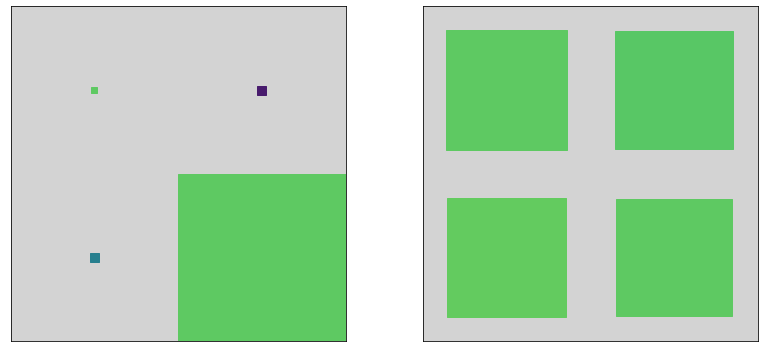

In [23]:
from forest.benchmarking.observable_estimation import get_results_by_qubit_groups

parallel_results = estimate_observables(qc, parallel_expt)
state_estimates = []

individual_results = get_results_by_qubit_groups(parallel_results, disjoint_sets_of_qubits)
for q in disjoint_sets_of_qubits:
    estimate = iterative_mle_state_estimate(individual_results[q], q, epsilon=.001, beta=.61)
    state_estimates.append(estimate)
    
pl_basis = n_qubit_pauli_basis(n=1)

fig, axes = plt.subplots(1, len(state_estimates), figsize=(12,5))
for idx, est in enumerate(state_estimates):
    hinton(est, ax=axes[idx])

plt.tight_layout()

### Lightweight Bootstrap for functionals of the state

In [24]:
import forest.benchmarking.distance_measures as dm
from forest.benchmarking.tomography import estimate_variance

In [25]:
from functools import partial
fast_tomo_est = partial(iterative_mle_state_estimate, epsilon=.0005, beta=.5, tol=1e-3)

**Purity**

In [26]:
mle_est = estimate_variance(results, qubits, fast_tomo_est, dm.purity,
                            n_resamples=40, project_to_physical=True)
lin_inv_est = estimate_variance(results, qubits, linear_inv_state_estimate, dm.purity,
                                n_resamples=40, project_to_physical=True)
print("(mean, standard error)")
print(mle_est)
print(lin_inv_est)

(mean, standard error)
(0.9922772132153728, 3.958627603079607e-06)
(0.9435900456057654, 0.00017697565779827685)


**Fidelity**

In [27]:
mle_est = estimate_variance(results, qubits, fast_tomo_est, dm.fidelity,
                            target_state=rho_true, n_resamples=40, project_to_physical=True)
lin_inv_est = estimate_variance(results, qubits, linear_inv_state_estimate, dm.fidelity,
                                target_state=rho_true, n_resamples=40, project_to_physical=True)

print("(mean, standard error)")
print(mle_est)
print(lin_inv_est)

(mean, standard error)
(0.9936759136729794, 1.6328600346275622e-06)
(0.968924323915877, 7.241582380286223e-05)


### Estimator accuracy for mixed state tomography

We can leverage the `PyQVM` and its `ReferenceDensitySimulator` to perform tomography on known mixed states.

In [28]:
from pyquil.pyqvm import PyQVM
from pyquil.simulation import ReferenceDensitySimulator
mixed_qvm = get_qc('1q-pyqvm')
# replace the simulator with a ReferenceDensitySimulator for mixed states
mixed_qvm.qam.wf_simulator = ReferenceDensitySimulator(n_qubits=1, rs=mixed_qvm.qam.rs)

In [29]:
# we are going to supply the state ourselves, so we don't need a prep program
# we only need to indicate it is a state on qubit 0
qubits = [0]
experiment = generate_state_tomography_experiment(program=Program(), qubits=qubits)
print(experiment)


0: Z+_0→(1+0j)*X0
1: Z+_0→(1+0j)*Y0
2: Z+_0→(1+0j)*Z0


In [30]:
# NBVAL_SKIP
# this cell is slow, so we skip it during testing

import forest.benchmarking.operator_tools.random_operators as rand_ops
from forest.benchmarking.distance_measures import infidelity
infidn =[]
trdn =[]
n_shots_max = [400,1000,4000,16000,64000]
number_of_states = 30
for nshots in n_shots_max:
    infid = []
    trd = []
    for _ in range(0, number_of_states):
        # set the inital state of the simulator
        rho_true = rand_ops.bures_measure_state_matrix(2)
        mixed_qvm.qam.wf_simulator.set_initial_state(rho_true).reset()
        # gather data
        resultsy = list(estimate_observables(qc=mixed_qvm, obs_expt=experiment, num_shots=nshots))
        # estimate
        rho_est = iterative_mle_state_estimate(results=resultsy, qubits=qubits, maxiter=100_000)
        infid.append(infidelity(rho_true, rho_est))
        trd.append(trace_distance(rho_true, rho_est))
    infidn.append({'mean': np.mean(np.real(infid)), 'std': np.std(np.real_if_close(infid))})
    trdn.append({'mean': np.mean(np.real(trd)), 'std': np.std(np.real_if_close(trd))})

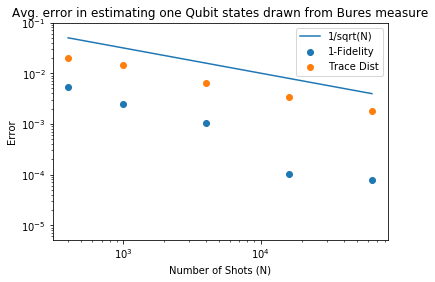

In [31]:
# NBVAL_SKIP

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(infidn)
dt = pd.DataFrame(trdn)
plt.scatter(n_shots_max,df['mean'],label='1-Fidelity')
plt.scatter(n_shots_max,dt['mean'],label='Trace Dist')
plt.plot(n_shots_max,1/np.sqrt(n_shots_max),label='1/sqrt(N)')
plt.yscale('log')
plt.xscale('log')
plt.ylim([0.0000051,0.1])
plt.ylabel('Error')
plt.xlabel('Number of Shots (N)')
plt.title('Avg. error in estimating one Qubit states drawn from Bures measure')
plt.legend()
plt.show()